In [11]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

## Relación entre publicaciones y postulaciones

In [2]:
types= {"nombre_area": "category", "nivel_laboral": "category", "tipo_de_trabajo": "category"}
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv', dtype=types)

In [3]:
datetimes=["fechapostulacion"]
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv', parse_dates=datetimes)

In [4]:
df_avisos_detalle.head(2)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [5]:
df_postulaciones_avisos = pd.merge(df_avisos_detalle,df_postulaciones, on="idaviso", how="inner")

In [6]:
postulaciones_promedio_tipo_trabajo=df_postulaciones_avisos.groupby(["tipo_de_trabajo"]).size()/df_avisos_detalle.groupby("tipo_de_trabajo").size()

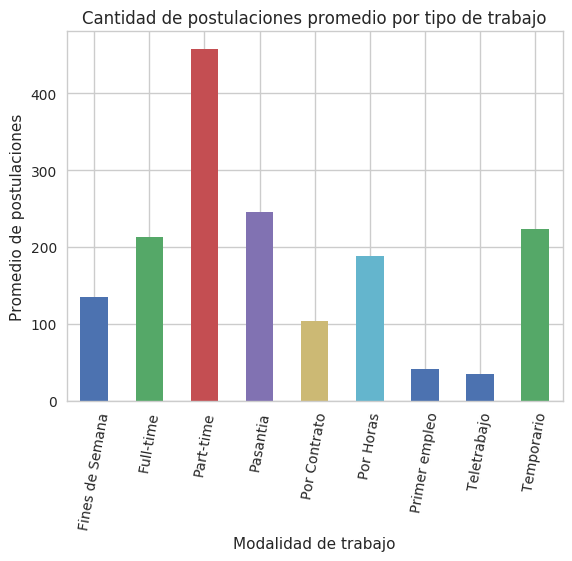

In [12]:
title = 'Cantidad de postulaciones promedio por tipo de trabajo'
ax = postulaciones_promedio_tipo_trabajo.plot(kind='bar',rot=80,title=title)
ax = plt.gca()
ax.set_ylabel('Promedio de postulaciones');
ax.set_xlabel('Modalidad de trabajo');

In [14]:
df_postulaciones_avisos["diadelasemana"] = df_postulaciones_avisos.fechapostulacion.dt.dayofweek
aux = df_postulaciones_avisos.groupby(["tipo_de_trabajo","diadelasemana"]).size().to_frame().reset_index(level=[0,1])

Text(0.5,1,'Densidad de visitas por día y modalidad')

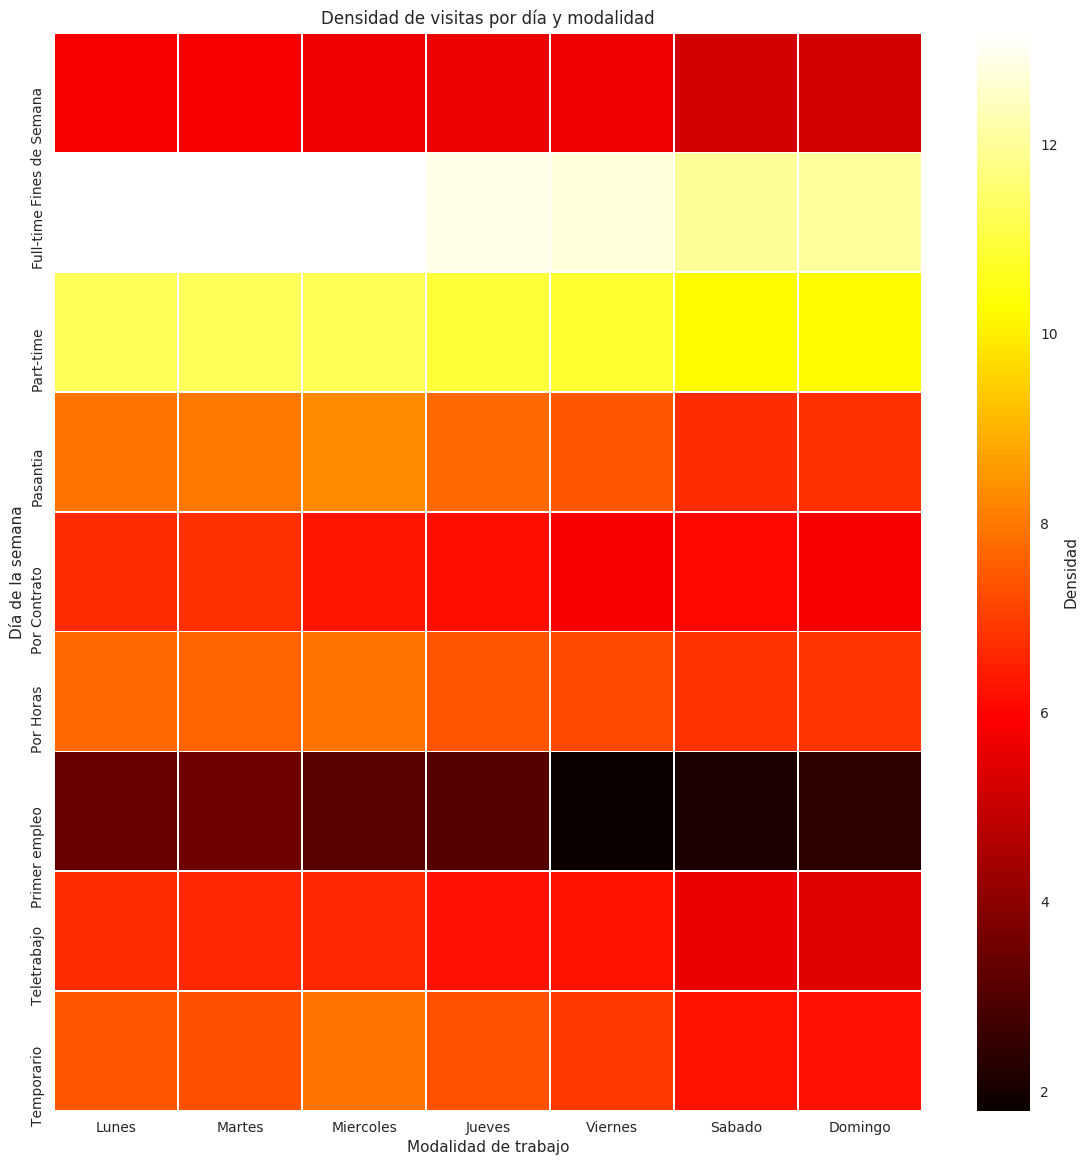

In [15]:
aux.columns = ['tipo_de_trabajo', 'dia_de_la_semana', 'cantidad']
aux.cantidad = np.log(aux.cantidad+1)
fig, ax = plt.subplots(figsize=(14,14))         # Sample figsize in inches

weekday_map= ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
graph = sns.heatmap(aux.pivot_table(index='tipo_de_trabajo',columns='dia_de_la_semana',values='cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'})
ax.set_ylabel('Día de la semana');
ax.set_xlabel('Modalidad de trabajo');
ax.set_title("Densidad de visitas por día y modalidad")

In [10]:
dias = pd.datetime.isoweekday